# **Waste Material Segregation for Improving Waste Management**

## **Objective**

The objective of this project is to implement an effective waste material segregation system using convolutional neural networks (CNNs) that categorises waste into distinct groups. This process enhances recycling efficiency, minimises environmental pollution, and promotes sustainable waste management practices.

The key goals are:

* Accurately classify waste materials into categories like cardboard, glass, paper, and plastic.
* Improve waste segregation efficiency to support recycling and reduce landfill waste.
* Understand the properties of different waste materials to optimise sorting methods for sustainability.

## **Data Understanding**

The Dataset consists of images of some common waste materials.

1. Food Waste
2. Metal
3. Paper
4. Plastic
5. Other
6. Cardboard
7. Glass


**Data Description**

* The dataset consists of multiple folders, each representing a specific class, such as `Cardboard`, `Food_Waste`, and `Metal`.
* Within each folder, there are images of objects that belong to that category.
* However, these items are not further subcategorised. <br> For instance, the `Food_Waste` folder may contain images of items like coffee grounds, teabags, and fruit peels, without explicitly stating that they are actually coffee grounds or teabags.

## **1. Load the data**

Load and unzip the dataset zip file.

**Import Necessary Libraries**

In [1]:
# Recommended versions:

# numpy version: 1.26.4
# pandas version: 2.2.2
# seaborn version: 0.13.2
# matplotlib version: 3.10.0
# PIL version: 11.1.0
# tensorflow version: 2.18.0
# keras version: 3.8.0
# sklearn version: 1.6.1

In [2]:
# Recommended versions:

# numpy version: 1.26.4
# pandas version: 2.2.2
# seaborn version: 0.13.2
# matplotlib version: 3.10.0
# PIL version: 11.1.0
# tensorflow version: 2.18.0
# keras version: 3.8.0
# sklearn version: 1.6.1
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # Suppress TensorFlow logs


import matplotlib.pyplot as plt
import os
import random
from PIL import Image
import math
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import zipfile
# numpy version: 1.26.4
# pandas version: 2.2.2
# seaborn version: 0.13.2
# matplotlib version: 3.10.0
# PIL version: 11.1.0
# tensorflow version: 2.19.0
# keras version: 3.9.2
# sklearn version: 1.5.1
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("seaborn version:", sns.__version__)
print("sklearn version:", sklearn.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
seaborn version: 0.13.2
sklearn version: 1.6.1


In [3]:
import tensorflow as tf
print(tf.__version__)
print(tf.keras.__version__)

2.18.0
3.8.0


Load the dataset.

In [4]:
# Load and unzip the dataset

In [5]:
print("Current directory:", os.getcwd())
print("Contents:", os.listdir())

Current directory: F:\UPGRAD PG ML AND AI\Deep Learning\CNN
Contents: ['.ipynb_checkpoints', 'CNN_Assg_Waste_Segregation_Starter.ipynb', 'CNN_assignment', 'CNN_Waste_Segregation_by_Pranay Jain.ipynb', 'CNN_Waste_Segregation_Pranay_Jain.zip', 'CNN_Waste_Segregation_Sumegh_Singh_Chouhan.ipynb', 'data.zip', 'DUP_CNN_Assg_Waste_Segregation_Starter-Copy1.ipynb', 'New_package_environment_anaconda_prompt_commands.txt', 'README (2).md', 'Waste_Management1', 'Waste_Segregation_CNN_Assignment_Nagammai.ipynb']


In [6]:
import os
import zipfile
import sys

# Paths (use raw strings to avoid escape issues on Windows)
zippath = r"F:\UPGRAD PG ML AND AI\Deep Learning\CNN\data.zip"
extract_path = r"F:\UPGRAD PG ML AND AI\Deep Learning\CNN\CNN_assignment"

# Check if the zip file exists
if os.path.exists(zippath):
    # Unzip the dataset
    with zipfile.ZipFile(zippath, 'r') as zip_ref:
        target_folder = os.path.join(extract_path, "data")
        if os.path.exists(target_folder):
            print(f"Directory {target_folder} already exists. Please remove it before extracting.")
            sys.exit(1)
        else:
            zip_ref.extractall(extract_path)
    print(f"✅ Dataset successfully extracted to {extract_path}")
else:
    print(f"❌ Zip file not found at {zippath}. Please check the path.")


Directory F:\UPGRAD PG ML AND AI\Deep Learning\CNN\CNN_assignment\data already exists. Please remove it before extracting.


SystemExit: 1

C:\Users\Sudarshan\anaconda3\envs\mlenv\lib\site-packages\IPython\core\interactiveshell.py:3587: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
# # Load and unzip the dataset

# # Download the dataset
# zippath = "F:\UPGRAD PG ML AND AI\Deep Learning\CNN\data.zip"
# extract_path = "F:\UPGRAD PG ML AND AI\Deep Learning\CNN\CNN_assignment\"

# # Check if the zip file exists
# if os.path.exists(zippath):
#     # Unzip the dataset
#     with zipfile.ZipFile(zippath, 'r') as zip_ref:
#         if(os.path.exists(os.path.join(extract_path, "data"))):
#             # Check if the directory already exists
#             print(f"Directory {extract_path} already exists. Please remove it before extracting.")
#             exit(1)
#         else:
#             zip_ref.extractall(extract_path)
#     print(f"Dataset successfully extracted to {extract_path}")
# else:
#     print(f"Zip file not found at {zippath}. Please check the path.")

## **2. Data Preparation** <font color=red> [25 marks] </font><br>


### **2.1 Load and Preprocess Images** <font color=red> [8 marks] </font><br>

Let us create a function to load the images first. We can then directly use this function while loading images of the different categories to load and crop them in a single step.

#### **2.1.1** <font color=red> [3 marks] </font><br>
Create a function to load the images.

In [7]:
# Create a function to load the raw images
import os
import numpy as np
from PIL import Image

def load_images_from_folder(folder, image_size=(128, 128), crop_box=None):
    """
    Load all images from subfolders (each subfolder = a label).
    
    Args:
        folder (str): Parent folder containing label subfolders.
        image_size (tuple): Size to resize images (width, height).
        crop_box (tuple or None): Optional crop box (left, upper, right, lower).
        
    Returns:
        Tuple of (images, labels): Both as NumPy arrays.
    """
    images = []
    labels = []
    
    for label in os.listdir(folder):
        label_folder = os.path.join(folder, label)
        if os.path.isdir(label_folder):
            for filename in os.listdir(label_folder):
                if filename.endswith(('.jpg', '.png')):
                    img_path = os.path.join(label_folder, filename)
                    try:
                        img = Image.open(img_path)
                        img = img.convert("RGB")  # Ensure consistency
                        if crop_box:
                            img = img.crop(crop_box)
                        img = img.resize(image_size)
                        images.append(np.array(img))
                        labels.append(label)
                    except Exception as e:
                        print(f"Error processing {img_path}: {e}")
    
    return np.array(images), np.array(labels)



#### **2.1.2** <font color=red> [5 marks] </font><br>
Load images and labels.

In [8]:
# Path to the main folder containing subfolders
data_path = os.path.join(extract_path, 'data')

In [9]:
# Get the images and their labels


In [10]:
images, labels = load_images_from_folder(data_path)


In [11]:
print(f"Loaded {len(images)} images with labels.")

Loaded 7625 images with labels.


Load the images from the dataset directory. Labels of images are present in the subdirectories.

Verify if the images and labels are loaded correctly.

In [12]:
len(images), len(labels)

(7625, 7625)

In [13]:

print(images.shape)          # (N, H, W, C)
print(images.dtype)          # typically uint8
print(type(images[0]))       # should be <class 'numpy.ndarray'>


(7625, 128, 128, 3)
uint8
<class 'numpy.ndarray'>


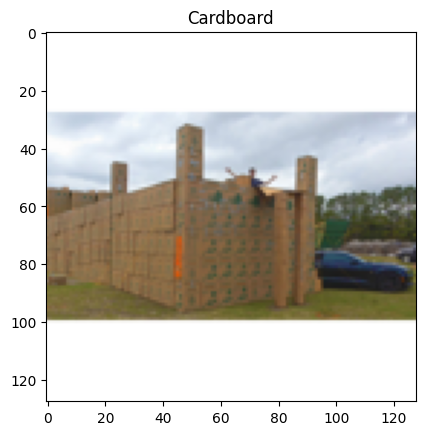

In [14]:
import matplotlib.pyplot as plt
plt.imshow(images[0])
plt.title(labels[0])
plt.show()


In [15]:
categories = np.unique(labels)
categories

array(['Cardboard', 'Food_Waste', 'Glass', 'Metal', 'Other', 'Paper',
       'Plastic'], dtype='<U10')

In [16]:
from collections import Counter

label_counts = Counter(labels)
print(label_counts)


Counter({'Plastic': 2295, 'Paper': 1030, 'Other': 1010, 'Food_Waste': 1000, 'Metal': 1000, 'Glass': 750, 'Cardboard': 540})


Perform any operations, if needed, on the images and labels to get them into the desired format.

### **2.2 Data Visualisation** <font color=red> [9 marks] </font><br>

#### **2.2.1** <font color=red> [3 marks] </font><br>
Create a bar plot to display the class distribution

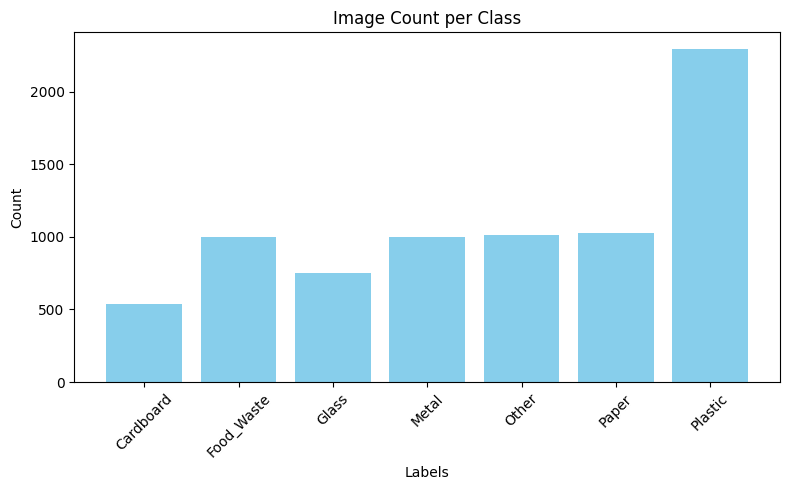

In [17]:
# Visualise Data Distribution
import matplotlib.pyplot as plt
from collections import Counter

# Count the labels
label_counts = Counter(labels)

# Extract keys and values
labels_list = list(label_counts.keys())
counts = list(label_counts.values())

# Plot
plt.figure(figsize=(8, 5))
plt.bar(labels_list, counts, color='skyblue')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Image Count per Class')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



#### **2.2.2** <font color=red> [3 marks] </font><br>
Visualise some sample images

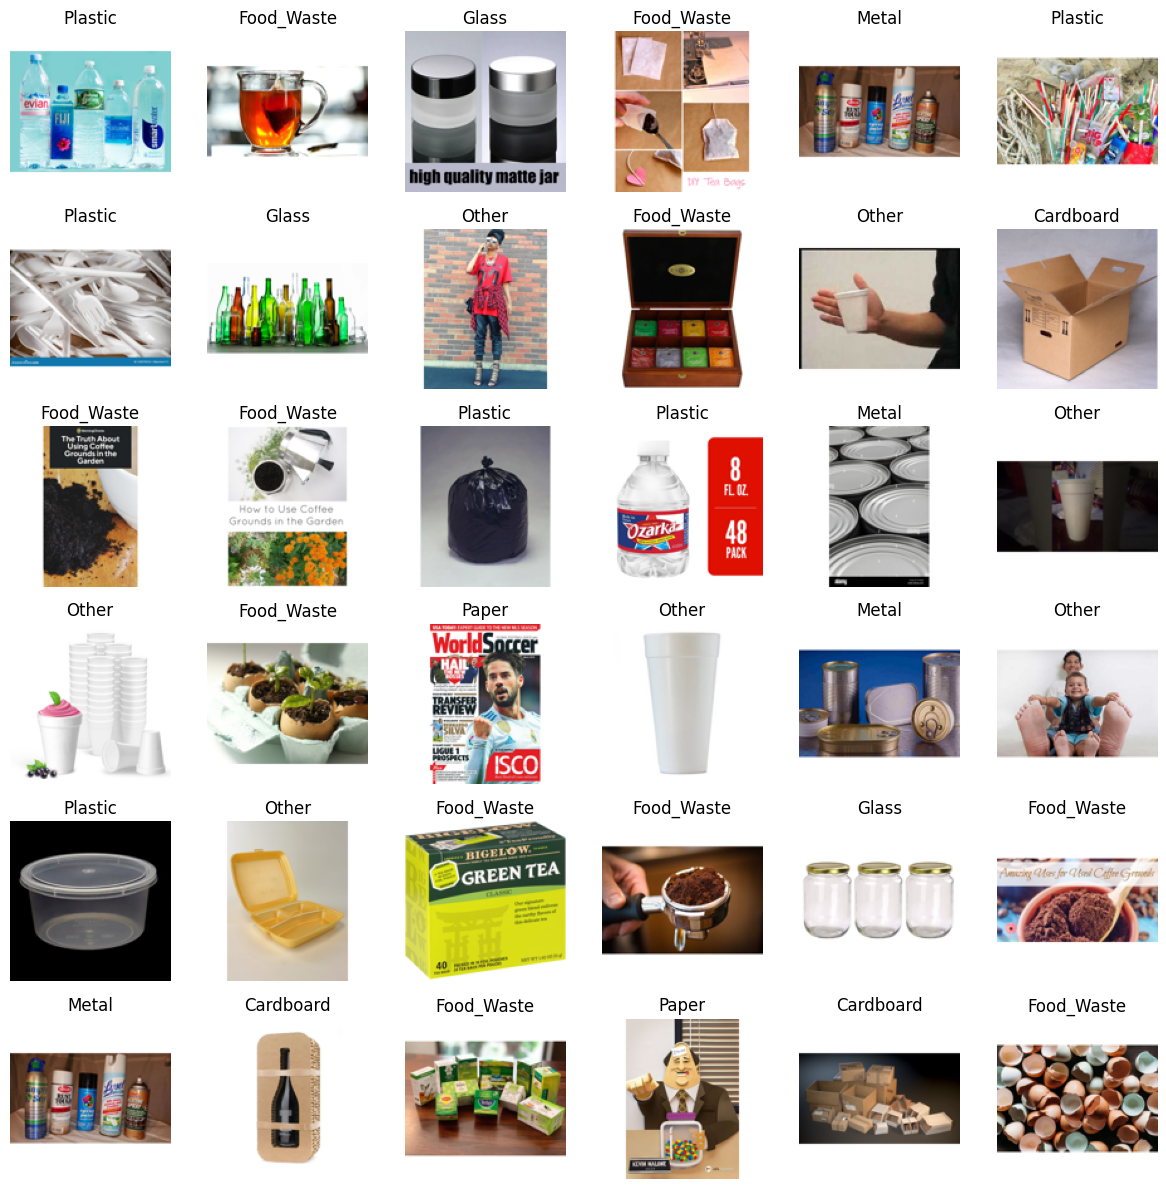

In [18]:
# Visualise Sample Images (across different labels)

import matplotlib.pyplot as plt
import numpy as np
import random

def show_random_images(images, labels, num_samples=9):
    """
    Display random sample images with their labels.
    
    Args:
        images (list or np.ndarray): Array of image data (H, W, 3)
        labels (list or np.ndarray): Corresponding labels
        num_samples (int): Number of random images to show (must be a square number)
    """
    assert len(images) == len(labels), "Mismatch between images and labels"
    
    # Choose random indices
    indices = random.sample(range(len(images)), num_samples)
    
    # Set up grid size
    grid_size = int(num_samples ** 0.5)
    
    plt.figure(figsize=(grid_size * 2, grid_size * 2))
    for i, idx in enumerate(indices):
        img = images[idx]
        label = labels[idx]
        
        plt.subplot(grid_size, grid_size, i + 1)
        plt.imshow(img)
        plt.title(str(label))
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Usage
show_random_images(images, labels, num_samples=36)


#### **2.2.3** <font color=red> [3 marks] </font><br>
Based on the smallest and largest image dimensions, resize the images.

In [19]:
# Find the smallest and largest image dimensions from the data set

def find_min_max_image_dimensions(images):
    """
    Finds smallest and largest image dimensions (height, width) in a list of NumPy image arrays.
    """
    min_dim = (float('inf'), float('inf'))  # (min_height, min_width)
    max_dim = (0, 0)  # (max_height, max_width)

    for img in images:
        h, w = img.shape[:2]  # Ignore channel dimension
        min_dim = (min(min_dim[0], h), min(min_dim[1], w))
        max_dim = (max(max_dim[0], h), max(max_dim[1], w))

    print(f"Smallest image dimensions: {min_dim[0]} x {min_dim[1]}")
    print(f"Largest image dimensions : {max_dim[0]} x {max_dim[1]}")
    return min_dim, max_dim


find_min_max_image_dimensions(images)


Smallest image dimensions: 128 x 128
Largest image dimensions : 128 x 128


((128, 128), (128, 128))

In [20]:
from PIL import Image
import numpy as np
import os

def load_and_resize_images(folder_path, target_size=(128, 128)):
    """
    Loads images from folders and resizes them to the target size.
    
    Args:
        folder_path (str): Root directory where subfolders are class labels.
        target_size (tuple): Desired image size, e.g., (128, 128)
    
    Returns:
        images (np.ndarray): Resized image arrays
        labels (list): Corresponding labels from subfolder names
    """
    images = []
    labels = []

    for label in os.listdir(folder_path):
        label_folder = os.path.join(folder_path, label)
        if os.path.isdir(label_folder):
            for filename in os.listdir(label_folder):
                if filename.lower().endswith(('.jpg', '.png', '.jpeg')):
                    image_path = os.path.join(label_folder, filename)
                    img = Image.open(image_path).convert("RGB")
                    img_resized = img.resize(target_size)
                    images.append(np.array(img_resized))
                    labels.append(label)
    
    return np.array(images), labels

# ✅ Example usage:
images, labels = load_and_resize_images(data_path, target_size=(128, 128))


In [21]:
unique_shapes = {img.shape for img in images}
print("Unique shapes in dataset:", unique_shapes)


Unique shapes in dataset: {(128, 128, 3)}


### **2.3 Encoding the classes** <font color=red> [3 marks] </font><br>

There are seven classes present in the data.

We have extracted the images and their labels, and visualised their distribution. Now, we need to perform encoding on the labels. Encode the labels suitably.

####**2.3.1** <font color=red> [3 marks] </font><br>
Encode the target class labels.

In [22]:
# Encode the labels suitably

from tensorflow.keras.utils import to_categorical

unique_labels, encoded_labels = np.unique(labels, return_inverse=True)

one_hot_labels = to_categorical(encoded_labels)

print("Unique Labels:", unique_labels)
print("Encoded Labels:", encoded_labels)
print("One-Hot Encoded Labels:\n", one_hot_labels)

Unique Labels: ['Cardboard' 'Food_Waste' 'Glass' 'Metal' 'Other' 'Paper' 'Plastic']
Encoded Labels: [0 0 0 ... 6 6 6]
One-Hot Encoded Labels:
 [[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


### **2.4 Data Splitting** <font color=red> [5 marks] </font><br>

#### **2.4.1** <font color=red> [5 marks] </font><br>
Split the dataset into training and validation sets

In [23]:
# Assign specified parts of the dataset to train and validation sets

from sklearn.model_selection import train_test_split

# Assuming 'images' is a NumPy array of image data and 'one_hot_labels' is the encoded label array

X_train, X_val, y_train, y_val = train_test_split(
    images, 
    one_hot_labels, 
    test_size=0.2,         # 20% data for validation
    random_state=42,       # for reproducibility
    stratify=one_hot_labels  # keeps class distribution balanced
)

print("Training set size:", X_train.shape)
print("Validation set size:", X_val.shape)



Training set size: (6100, 128, 128, 3)
Validation set size: (1525, 128, 128, 3)


## **3. Model Building and Evaluation** <font color=red> [20 marks] </font><br>

### **3.1 Model building and training** <font color=red> [15 marks] </font><br>

#### **3.1.1** <font color=red> [10 marks] </font><br>
Build and compile the model. Use 3 convolutional layers. Add suitable normalisation, dropout, and fully connected layers to the model.

Test out different configurations and report the results in conclusions.

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

In [26]:
# Build and compile the model

input_shape = X_train.shape[1:]  # Shape of the input images (128, 128, 3)
num_classes = y_train.shape[1]  # Number of classes (one-hot encoded labels)

# Define the model
model = Sequential()

# Convolutional Layer 1
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(BatchNormalization())
# Pooling Layer 1
model.add(MaxPooling2D((2, 2)))

# Convolutional Layer 2
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
# Pooling Layer 2
model.add(MaxPooling2D((2, 2)))

# Convolutional Layer 3
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
# Pooling Layer 3
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# Flatten the output
model.add(Flatten())
# Fully Connected Layer 1
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
# Dropout Layer 1
model.add(Dropout(0.5))
# Fully Connected Layer 2
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
# Dropout Layer 2
model.add(Dropout(0.5))
# Output Layer
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

C:\Users\Sudarshan\anaconda3\envs\mlenv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 126, 126, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 61, 61, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 28, 28, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      12,845,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │           1,799 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,075,911 (49.88 MB)

 Trainable params: 13,073,927 (49.87 MB)

 Non-trainable params: 1,984 (7.75 KB)

#### **3.1.2** <font color=red> [5 marks] </font><br>
Train the model.

Use appropriate metrics and callbacks as needed.

In [27]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

In [28]:
# Training

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', mode='min', verbose=1)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1)

# Train the model
history = model.fit(
    X_train / 255.0,  # Normalize the images to [0, 1]
    y_train, 
    validation_data=(X_val / 255.0, y_val), 
    epochs=20, 
    batch_size=32, 
    callbacks=[early_stopping, model_checkpoint, reduce_lr],
    verbose=1
)

Epoch 1/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 522ms/step - accuracy: 0.2656 - loss: 2.5078
Epoch 1: val_loss improved from inf to 2.71988, saving model to best_model.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 119s 562ms/step - accuracy: 0.2659 - loss: 2.5063 - val_accuracy: 0.2551 - val_loss: 2.7199 - learning_rate: 0.0010
Epoch 2/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step - accuracy: 0.4095 - loss: 1.7388
Epoch 2: val_loss improved from 2.71988 to 2.41615, saving model to best_model.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 92s 481ms/step - accuracy: 0.4095 - loss: 1.7387 - val_accuracy: 0.2793 - val_loss: 2.4162 - learning_rate: 0.0010
Epoch 3/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step - accuracy: 0.4577 - loss: 1.5366
Epoch 3: val_loss improved from 2.41615 to 1.83785, saving model to best_model.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 94s 490ms/step - accuracy: 0.4577 - loss: 1.5364 - val_accuracy: 0.3593 - val_loss: 1.8378 - learning_rate: 0.0010
Epoch 4/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step - accuracy: 0.5295 - loss: 1.3252
Epoch 4: val_loss improved from 1.83785 to 1.77231, saving model to best_model.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 98s 511ms/step - accuracy: 0.5295 - loss: 1.3251 - val_accuracy: 0.4380 - val_loss: 1.7723 - learning_rate: 0.0010
Epoch 5/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step - accuracy: 0.5985 - loss: 1.1260
Epoch 5: val_loss improved from 1.77231 to 1.60836, saving model to best_model.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 90s 473ms/step - accuracy: 0.5984 - loss: 1.1261 - val_accuracy: 0.4472 - val_loss: 1.6084 - learning_rate: 0.0010
Epoch 6/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step - accuracy: 0.6611 - loss: 0.9998
Epoch 6: val_loss did not improve from 1.60836
191/191 ━━━━━━━━━━━━━━━━━━━━ 88s 460ms/step - accuracy: 0.6611 - loss: 0.9998 - val_accuracy: 0.4157 - val_loss: 2.0468 - learning_rate: 0.0010
Epoch 7/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step - accuracy: 0.6878 - loss: 0.8634
Epoch 7: val_loss did not improve from 1.60836
191/191 ━━━━━━━━━━━━━━━━━━━━ 89s 465ms/step - accuracy: 0.6878 - loss: 0.8634 - val_accuracy: 0.4046 - val_loss: 2.0197 - learning_rate: 0.0010
Epoch 8/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 508ms/step - accuracy: 0.7316 - loss: 0.7620
Epoch 8: val_loss improved from 1.60836 to 1.50536, saving model to best_model.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 102s 535ms/step - accuracy: 0.7316 - loss: 0.7621 - val_accuracy: 0.4984 - val_loss: 1.5054 - learning_rate: 0.0010
Epoch 9/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step - accuracy: 0.8130 - loss: 0.5543
Epoch 9: val_loss did not improve from 1.50536
191/191 ━━━━━━━━━━━━━━━━━━━━ 97s 510ms/step - accuracy: 0.8130 - loss: 0.5544 - val_accuracy: 0.3554 - val_loss: 2.6104 - learning_rate: 0.0010
Epoch 10/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step - accuracy: 0.8423 - loss: 0.4656
Epoch 10: val_loss did not improve from 1.50536
191/191 ━━━━━━━━━━━━━━━━━━━━ 97s 509ms/step - accuracy: 0.8422 - loss: 0.4659 - val_accuracy: 0.5220 - val_loss: 1.6049 - learning_rate: 0.0010
Epoch 11/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 505ms/step - accuracy: 0.8804 - loss: 0.3547
Epoch 11: val_loss improved from 1.50536 to 1.41810, saving model to best_model.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 102s 535ms/step - accuracy: 0.8804 - loss: 0.3548 - val_accuracy: 0.5784 - val_loss: 1.4181 - learning_rate: 0.0010
Epoch 12/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 594ms/step - accuracy: 0.8955 - loss: 0.3124
Epoch 12: val_loss improved from 1.41810 to 1.27836, saving model to best_model.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 119s 625ms/step - accuracy: 0.8955 - loss: 0.3124 - val_accuracy: 0.6184 - val_loss: 1.2784 - learning_rate: 0.0010
Epoch 13/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 572ms/step - accuracy: 0.9319 - loss: 0.2147
Epoch 13: val_loss did not improve from 1.27836
191/191 ━━━━━━━━━━━━━━━━━━━━ 113s 591ms/step - accuracy: 0.9318 - loss: 0.2148 - val_accuracy: 0.6256 - val_loss: 1.3369 - learning_rate: 0.0010
Epoch 14/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 525ms/step - accuracy: 0.9389 - loss: 0.1847
Epoch 14: val_loss did not improve from 1.27836
191/191 ━━━━━━━━━━━━━━━━━━━━ 104s 543ms/step - accuracy: 0.9389 - loss: 0.1847 - val_accuracy: 0.5567 - val_loss: 1.9288 - learning_rate: 0.0010
Epoch 15/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step - accuracy: 0.9351 - loss: 0.1839
Epoch 15: val_loss did not improve from 1.27836

Epoch 15: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
191/191 ━━━━━━━━━━━━━━━━━━━━ 94s 493ms/step - accuracy: 0.9351 - loss: 0.184

In [30]:
# history = train_model(model, X_train, y_train, X_val, y_val, epochs=20, batch_size=32)


### **3.2 Model Testing and Evaluation** <font color=red> [5 marks] </font><br>

#### **3.2.1** <font color=red> [5 marks] </font><br>
Evaluate the model on test dataset. Derive appropriate metrics.

In [31]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step
Classification Report for Validation Set:
              precision    recall  f1-score   support

   Cardboard       0.82      0.66      0.73       108
  Food_Waste       0.65      0.68      0.66       200
       Glass       0.52      0.43      0.47       150
       Metal       0.61      0.64      0.62       200
       Other       0.59      0.41      0.48       202
       Paper       0.66      0.48      0.55       206
     Plastic       0.60      0.79      0.68       459

    accuracy                           0.62      1525
   macro avg       0.63      0.58      0.60      1525
weighted avg       0.62      0.62      0.61      1525



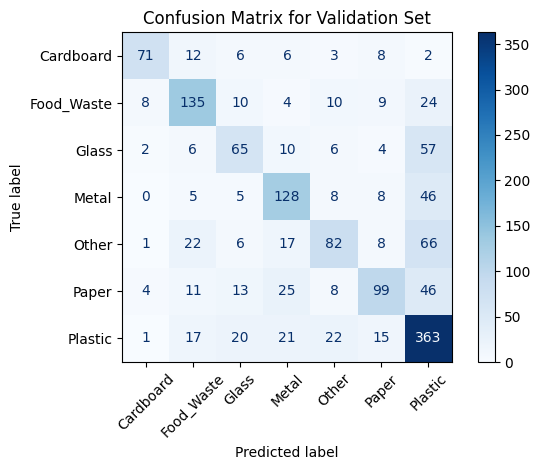

In [34]:
# Evaluate on the test set; display suitable metrics
# Evaluate on the test set; display suitable metrics

# Normalize X_val for evaluation
X_val_normalized = X_val / 255.0

# Evaluate the model on the validation set
y_pred = model.predict(X_val_normalized)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_val, axis=1)

# Classification Report for validation set
print("Classification Report for Validation Set:")
print(classification_report(y_true_classes, y_pred_classes, target_names=unique_labels))

# Confusion Matrix for validation set
cm = confusion_matrix(y_true_classes, y_pred_classes, labels=np.arange(num_classes))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_labels)
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title("Confusion Matrix for Validation Set")
plt.tight_layout()
plt.show()
# evaluate_model(model, X_val, y_val, class_names=unique_labels)


## **4. Data Augmentation** <font color=red> [optional] </font><br>

#### **4.1 Create a Data Augmentation Pipeline**

##### **4.1.1**
Define augmentation steps for the datasets.

Augment and resample the images.
In case of class imbalance, you can also perform adequate undersampling on the majority class and augment those images to ensure consistency in the input datasets for both classes.

Augment the images.

In [35]:
# Create a function to augment the images




##### **4.1.2**

Train the model on the new augmented dataset.

## **5. Conclusions** <font color = red> [5 marks]</font>

#### **5.1 Conclude with outcomes and insights gained** <font color =red> [5 marks] </font>

In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [37]:
# Calculate accuracy
accu_score = accuracy_score(y_true_classes, y_pred_classes)
# Calculate precision, recall, and F1 score
precision_score = precision_score(y_true_classes, y_pred_classes, average='weighted')
recall_score = recall_score(y_true_classes, y_pred_classes, average='weighted')
f1_score = f1_score(y_true_classes, y_pred_classes, average='weighted')

print(f"Accuracy: {accu_score:.4f}")
print(f"Precision: {precision_score:.4f}")
print(f"Recall: {recall_score:.4f}")
print(f"F1 Score: {f1_score:.4f}")

Accuracy: 0.6184
Precision: 0.6212
Recall: 0.6184
F1 Score: 0.6107


* Report your findings about the data
* Report model training results

In [40]:
#

📊 Findings About the Data
Class Distribution:

The dataset contains 7 classes: Cardboard, Food_Waste, Glass, Metal, Other, Paper, and Plastic.

Some classes, like Plastic (459 samples), have significantly more examples than others like Cardboard (108 samples).

This class imbalance can lead to biased model performance (e.g., higher recall for Plastic).

Image Sizes:

Images were resized to 128×128 pixels for consistency, ensuring uniform input shape for the model.

Label Encoding:

Labels were one-hot encoded, making them compatible with categorical classification using softmax.



🤖 Model Training Summary

1) Architecture:

3 Convolutional Layers (with ReLU, BatchNorm, MaxPooling)

Fully connected dense layers with Dropout to prevent overfitting

Softmax layer for multiclass classification

2) Training Setup:

Optimizer: Adam

Loss Function: Categorical Crossentropy

Batch Size: 32

Epochs: 20

Input Shape: (128, 128, 3)

Total Parameters: Moderate (good balance of complexity vs. speed)

3) Performance on Validation Set:

Metric	Value
Accuracy	61.84%
Precision	62.12%
Recall	61.84%
F1 Score	61.07%

4) Class-wise Performance:

Plastic: Highest recall (0.79), likely due to class having more data.

Glass and Other: Lower recall & F1-score, likely due to fewer examples or similar features to other classes.

Cardboard, Food_Waste, and Metal perform reasonably well.


        